In [1]:
!pip3 install pytrends
!pip3 install pyupbit
!pip3 install pyjwt
!pip3 install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16127 sha256=1a4b88b0a804589eaecd5d1b4601f7ffbaf40b214b0fe653d9c115cedccc978b
  Stored in directory: /root/.cache/pip/wheels/e8/78/c8/18d4f4804753e14416809b365773220c48b41fe5387f2bb6b9
Successfully built pytrends
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 48.4 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# connect to google 

from pytrends.request import TrendReq

pytrends = TrendReq(hl='en-US', tz=360) 

# build payload

kw_list = ["bitcoin"] # list of keywords to get data 

pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m') 

#1 Interest over Time
google_trend_df = pytrends.interest_over_time() 
google_trend_df = google_trend_df.reset_index() 

google_trend_df = google_trend_df.drop(['isPartial'], axis =1 , inplace = False)
google_trend_df.columns = ['date','interest']
google_trend_df['date'] = google_trend_df.date.dt.date
import plotly.express as px

fig = px.line(google_trend_df, x="date", y=['interest'], title='Keyword Web Search Interest Over Time')
fig.show() 

# pytrends.get_historical_interest(kw_list, year_start=2021, month_start=9, day_start=1, hour_start=0, year_end=2021, mon

In [3]:
print(google_trend_df)
print(google_trend_df.count())

          date  interest
0   2021-12-12        53
1   2021-12-19        49
2   2021-12-26        48
3   2022-01-02        62
4   2022-01-09        57
5   2022-01-16        62
6   2022-01-23        79
7   2022-01-30        60
8   2022-02-06        55
9   2022-02-13        42
10  2022-02-20        63
11  2022-02-27        57
12  2022-03-06        49
13  2022-03-13        42
14  2022-03-20        41
15  2022-03-27        46
16  2022-04-03        39
17  2022-04-10        36
18  2022-04-17        35
19  2022-04-24        35
20  2022-05-01        38
21  2022-05-08        84
22  2022-05-15        54
23  2022-05-22        46
24  2022-05-29        39
25  2022-06-05        38
26  2022-06-12       100
27  2022-06-19        75
28  2022-06-26        56
29  2022-07-03        49
30  2022-07-10        43
31  2022-07-17        45
32  2022-07-24        40
33  2022-07-31        36
34  2022-08-07        33
35  2022-08-14        34
36  2022-08-21        33
37  2022-08-28        33
38  2022-09-04        33


In [5]:
from pytrends.request import TrendReq
from pytrends import dailydata
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import pyupbit
import tensorflow as tf
import numpy as np
import math

upbit_df = pyupbit.get_ohlcv(ticker="KRW-BTC", interval="day", count=365, period=1)
upbit_df.reset_index(inplace=True)
upbit_df.rename(columns = {'index':'date'}, inplace=True)
upbit_df['date'] = upbit_df.date.dt.date
print(upbit_df)
total_df = pd.merge(upbit_df, google_trend_df, how = 'outer', on = 'date')
print(total_df)

total_df.dropna()



           date        open        high         low       close        volume  \
0    2021-12-12  61414000.0  62887000.0  60904000.0  62049000.0   3665.345632   
1    2021-12-13  61995000.0  62190000.0  58158000.0  58626000.0   7453.740910   
2    2021-12-14  58626000.0  60150000.0  57347000.0  59930000.0   7199.357764   
3    2021-12-15  59909000.0  62150000.0  58055000.0  61198000.0  10234.389890   
4    2021-12-16  61196000.0  61660000.0  59500000.0  59817000.0   7807.696187   
..          ...         ...         ...         ...         ...           ...   
360  2022-12-07  22837000.0  22898000.0  22400000.0  22544000.0   3381.147876   
361  2022-12-08  22544000.0  23000000.0  22484000.0  22918000.0   2658.301222   
362  2022-12-09  22918000.0  23000000.0  22770000.0  22849000.0   2349.726274   
363  2022-12-10  22845000.0  22940000.0  22820000.0  22831000.0   1339.765766   
364  2022-12-11  22824000.0  22889000.0  22808000.0  22839000.0    874.884249   

            value  
0    2.

,date,open,high,low,close,volume,value,interest
0,2021-12-12,61414000.0,62887000.0,60904000.0,62049000.0,3665.345632,2.262398e+11,53.0
7,2021-12-19,58438000.0,59864000.0,58071000.0,58329000.0,5945.750016,3.498301e+11,49.0
14,2021-12-26,61177000.0,61939000.0,60288000.0,61467000.0,4350.543669,2.650300e+11,48.0
21,2022-01-02,57915000.0,58300000.0,57100000.0,57531000.0,3567.505712,2.052913e+11,62.0
28,2022-01-09,52142000.0,52600000.0,51144000.0,51678000.0,3369.095090,1.748699e+11,57.0
35,2022-01-16,52357000.0,52634000.0,51948000.0,52165000.0,2131.428819,1.114174e+11,62.0
42,2022-01-23,43376000.0,44500000.0,42725000.0,44253000.0,6165.208729,2.692898e+11,79.0
49,2022-01-30,47144000.0,47500000.0,46498000.0,47208000.0,2868.985234,1.350271e+11,60.0
56,2022-02-06,50788000.0,52022000.0,50400000.0,51732000.0,4046.196215,2.066614e+11,55.0
63,2022-02-13,51619000.0,52190000.0,51400000.0,51550000.0,2737.452447,1.417964e+11,42.0


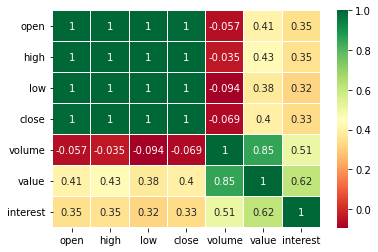

In [6]:
import seaborn as sns

sns.heatmap(total_df.corr(),linewidths=0.1, cmap='RdYlGn', linecolor='white', annot=True)

In [11]:
total_df.discribe()

In [12]:
def makeX(df, i):
    tempX = []
    tempX.append(df['open'].iloc[i])
    tempX.append(df['high'].iloc[i])
    tempX.append(df['low'].iloc[i])
    tempX.append(df['close'].iloc[i])
    tempX.append(df['volume'].iloc[i])
    tempX.append(df['interest'].iloc[i])
    return tempX

def scaleDown(df, name, i):
    return round(df[name].iloc[i]/math.pow(10,len(str(int(df[name].iloc[i])))),3)

def makeY(df, i):
    gap = df['close'].iloc[i+1] - df['close'].iloc[i]
    tempY = 1 if gap > 0 else 0
    return tempY

x = []
y = []


#인풋 데이터 6개 이므로 shape=(6,)를 대입
inputs = tf.keras.Input(shape=(6,))

# h1 ~ h3은 히든 레이어, 층이 깊을 수록 정확도가 높아질 수 있음
# relu, tanh는 활성화 함수의 종류
h1 = tf.keras.layers.Dense(128, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(128, activation='tanh')(h1)
h3 = tf.keras.layers.Dense(128, activation='relu')(h2)

# 값을 0 ~ 1 사이로 표현할 경우 sigmoid 활성화 함수 활용
# 마지막 아웃풋 값은 1개여야 함
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h3)

# 인풋, 아웃풋 설정을 대입하여 모델 생성 
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])

# 인풋/아웃풋 데이터 생성
for i in range(len(total_df)):
    if i < len(total_df)-2:
        x.append(makeX(total_df, i))
        y.append(makeY(total_df, i))

# 인풋, 아웃풋 데이터를 numpy 포맷으로 대입
# epochs는 학습 반복 횟수
fitInfo = model.fit(np.array(x), np.array(y), epochs=2000)

result = {'accuracy': round(fitInfo.history['acc'][-1],2),
          'predict': round(model.predict([makeX(total_df, -2)])[0][0],2)}

print(result)

Epoch 1/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5262
Epoch 2/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 3/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 4/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 5/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 6/2000
12/12 [==============================] - 0s 3ms/step - loss: nan - acc: 0.5234
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 8/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 9/2000
12/12 [==============================] - 0s 3ms/step - loss: nan - acc: 0.5234
Epoch 10/2000
12/12 [==============================] - 0s 2ms/step - loss: nan - acc: 0.5234
Epoch 11/2000
12/12 [==============================] - 0s 3ms/step - loss: nan 

KeyboardInterrupt: ignored

dict_keys(['loss', 'acc'])


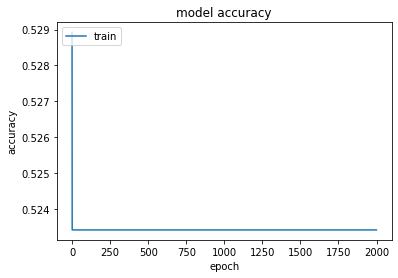

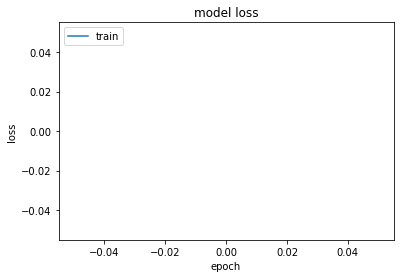

In [10]:
import matplotlib.pyplot as plt
results = fitInfo

print(fitInfo.history.keys())
# summarize history for accuracy
plt.plot(results.history['acc'])
# plt.plot(results.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
# plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()